# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [97]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [98]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    return x**2 * numpy.sin(x)

Ensure your function works with numpy arrays:

In [99]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [100]:
def g(x):
    '''Analytical integral of f(x).'''
    return -1* x ** 2 * numpy.cos(x) + 2 * x * numpy.sin(x) + 2 * numpy.cos(x) - 2


Check your solution with the same numpy array:

In [101]:
assert g(0) == 0.

In [102]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [103]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    return g(xmax) - g(xmin)

Check your analytic function:

In [104]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [105]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    
    
    delta_x = (xmax-xmin)/(2*N)
    
    evens = 0
    odds = 0
        
    for i in range(1, N):
        evens = evens + f(2*delta_x *i +xmin) # Sums up the even components of Simpson's Rule

    for i in range(1, (N+1)):
        odds = odds + f(delta_x * (2*i - 1) + xmin) # Sums up the odd components of Simpson's Rule

        
    return 1/3 * delta_x *(f(xmin) + 2 * evens + 4 * odds + f(xmax)) # Performs the final calculation
    
    

Make sure you have implemented Simpson's rule correctly:

In [106]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [107]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


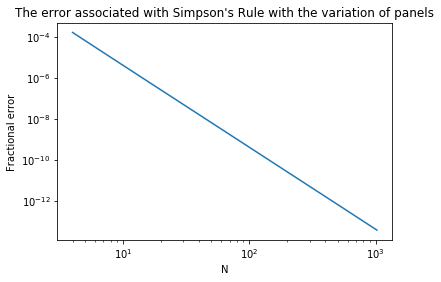

In [108]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution

results_numericratio = []

for x in panel_counts:
    results_numericratio.append((result_analytic - (integrate_numeric(x0, x1, x))) / (integrate_numeric(x0, x1, x)))
    

plt.xscale("log")
plt.yscale("log")
plt.xlabel("N")
plt.ylabel("Fractional error")
plt.title("The error associated with Simpson's Rule with the variation of panels")
plt.plot(panel_counts, results_numericratio)
    

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

The number of panels increases the accuracy of the numerical method. However, when the number of panels gets too large the uncertainty will increase due to the computer being unable to store the small values of h for each of the strips.

If the trapezium rule was being used, how would the panel
count affect accuracy? 

The increase in panel count would still improve accuracy. However, this would happen much slower and more panels for the trapezium would be needed to obtain the same accuracy of Simpson's Rule.